# Financial Analytics
---

In [5]:
import matplotlib.pyplot as plt
import quandl
    
%matplotlib inline

Get the data from quandl and store it in a dataframe...

In [6]:
QUANDL_API_KEY = 'Uy8cAhTFD43Ar_u4sRrr' 
quandl.ApiConfig.api_key = QUANDL_API_KEY
df = quandl.get('EURONEXT/ABN')
df.head(5)

,Open,High,Low,Last,Volume,Turnover
Date,,,,,,
2015-11-20,18.18,18.43,18.000,18.35,38392898.0,7.003281e+08
2015-11-23,18.45,18.70,18.215,18.61,3352514.0,6.186446e+07
2015-11-24,18.70,18.80,18.370,18.80,4871901.0,8.994087e+07
2015-11-25,18.85,19.50,18.770,19.45,4802607.0,9.153862e+07
2015-11-26,19.48,19.67,19.410,19.43,1648481.0,3.220713e+07


Plot the data using pandas inbuilt method...

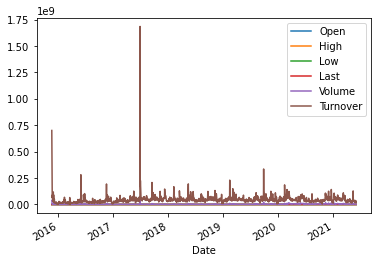

In [7]:
df.plot();

Plot the price and volume chart...

...top chart is price, the bottom volume.

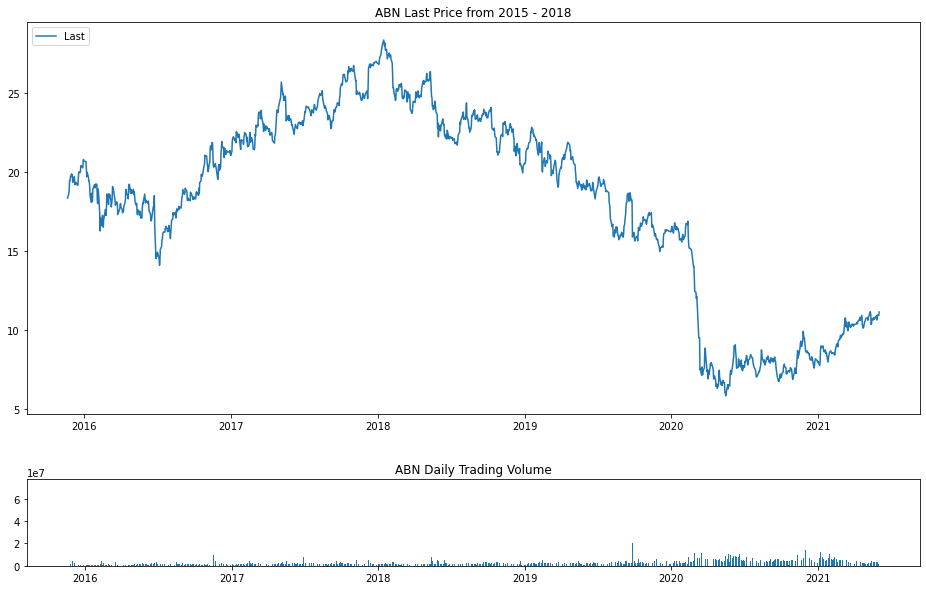

In [8]:
prices  = df['Last']
volumes = df['Volume']

top = plt.subplot2grid((4, 4), (0, 0), rowspan=3, colspan=4)
top.plot(prices.index, prices, label='Last')
plt.title('ABN Last Price from 2015 - 2018')
plt.legend(loc=2)

bottom = plt.subplot2grid((4, 4), (3,0), rowspan=1, colspan=4)
bottom.bar(volumes.index, volumes)
plt.title('ABN Daily Trading Volume')

plt.gcf().set_size_inches(16, 10)
plt.subplots_adjust(hspace=0.75)

- **subplot2grid()** with the first parameter, (4,4), divides the entire graph into a 4 x 4 grid. 
- The second parameter (0,0) specifies that the plot will be anchored top-left corner of the graph. 
- rowspan=3, indicates the plot will occupy 3 of the 4 available rows on the grid
- colspan=4, indicates that the plot will occupy all 4 columns of the grid (i.e. whole width). 
- The command returns a matplotlib axis object

### Plotting a candlestick chart
---
 
A candlestick represents a tick at each particular point of time with: the open, the high, the low, and the close.

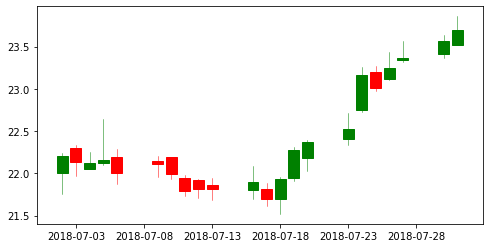

In [9]:
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

quandl.ApiConfig.api_key = QUANDL_API_KEY

df_subset = quandl.get('EURONEXT/ABN', start_date='2018-07-01', end_date='2018-07-31')
df_subset['Date'] = df_subset.index.map(mdates.date2num)
df_ohlc = df_subset[['Date','Open', 'High', 'Low', 'Last']]

figure, ax = plt.subplots(figsize = (8,4))
formatter = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(formatter)

candlestick_ohlc(ax, df_ohlc.values, width=0.8, colorup='green', colordown='red');